In [1]:
import yfinance as yf, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = yf.download('BTC-USD')
#df.head()

[*********************100%%**********************]  1 of 1 completed


In [3]:
# add time dummy
df['Time'] = np.arange(len(df.index))
#df.head()

In [4]:
# copy
columns = ['Adj Close','Time']
df_copy = df[columns].copy()
df_copy.head()

,Adj Close,Time
Date,,
2014-09-17,457.334015,0
2014-09-18,424.440002,1
2014-09-19,394.795990,2
2014-09-20,408.903992,3
2014-09-21,398.821014,4


In [5]:
# create lag feature
df_copy['Lag_1'] = df_copy['Adj Close'].shift(1)
df_copy.head()

,Adj Close,Time,Lag_1
Date,,,
2014-09-17,457.334015,0,NaN
2014-09-18,424.440002,1,457.334015
2014-09-19,394.795990,2,424.440002
2014-09-20,408.903992,3,394.795990
2014-09-21,398.821014,4,408.903992


In [6]:
# reordem columns
df_copy = df_copy.reindex(columns=['Time','Adj Close', 'Lag_1'])
df_copy.head()

,Time,Adj Close,Lag_1
Date,,,
2014-09-17,0,457.334015,NaN
2014-09-18,1,424.440002,457.334015
2014-09-19,2,394.795990,424.440002
2014-09-20,3,408.903992,394.795990
2014-09-21,4,398.821014,408.903992


<Axes: xlabel='Date'>

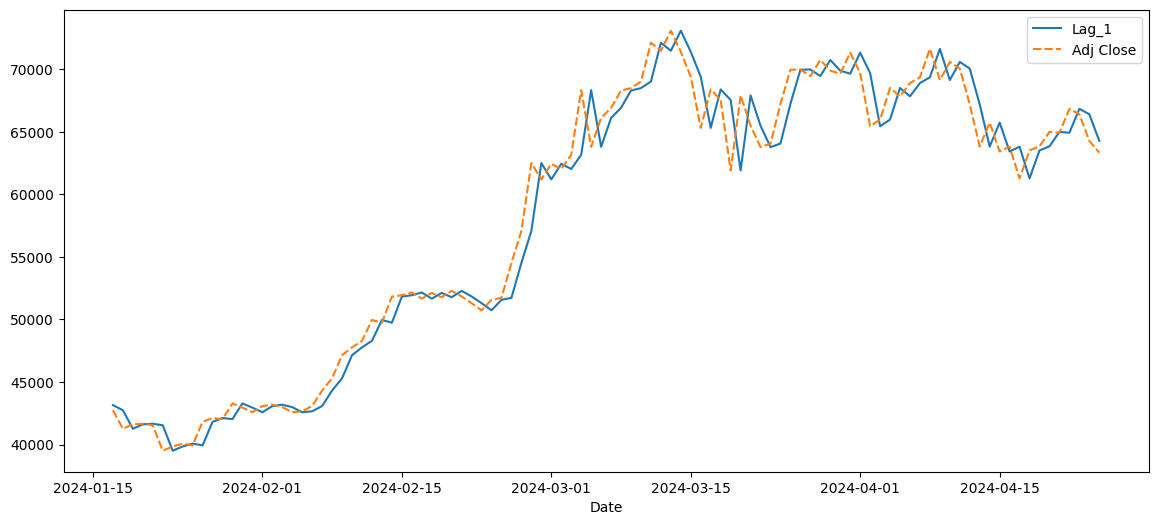

In [7]:
# print price over lags
columns = ['Lag_1','Adj Close']

plt.figure(figsize=(14,6))
sns.lineplot(data=df_copy[columns].tail(100))

In [8]:
# plt.style.use("seaborn")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

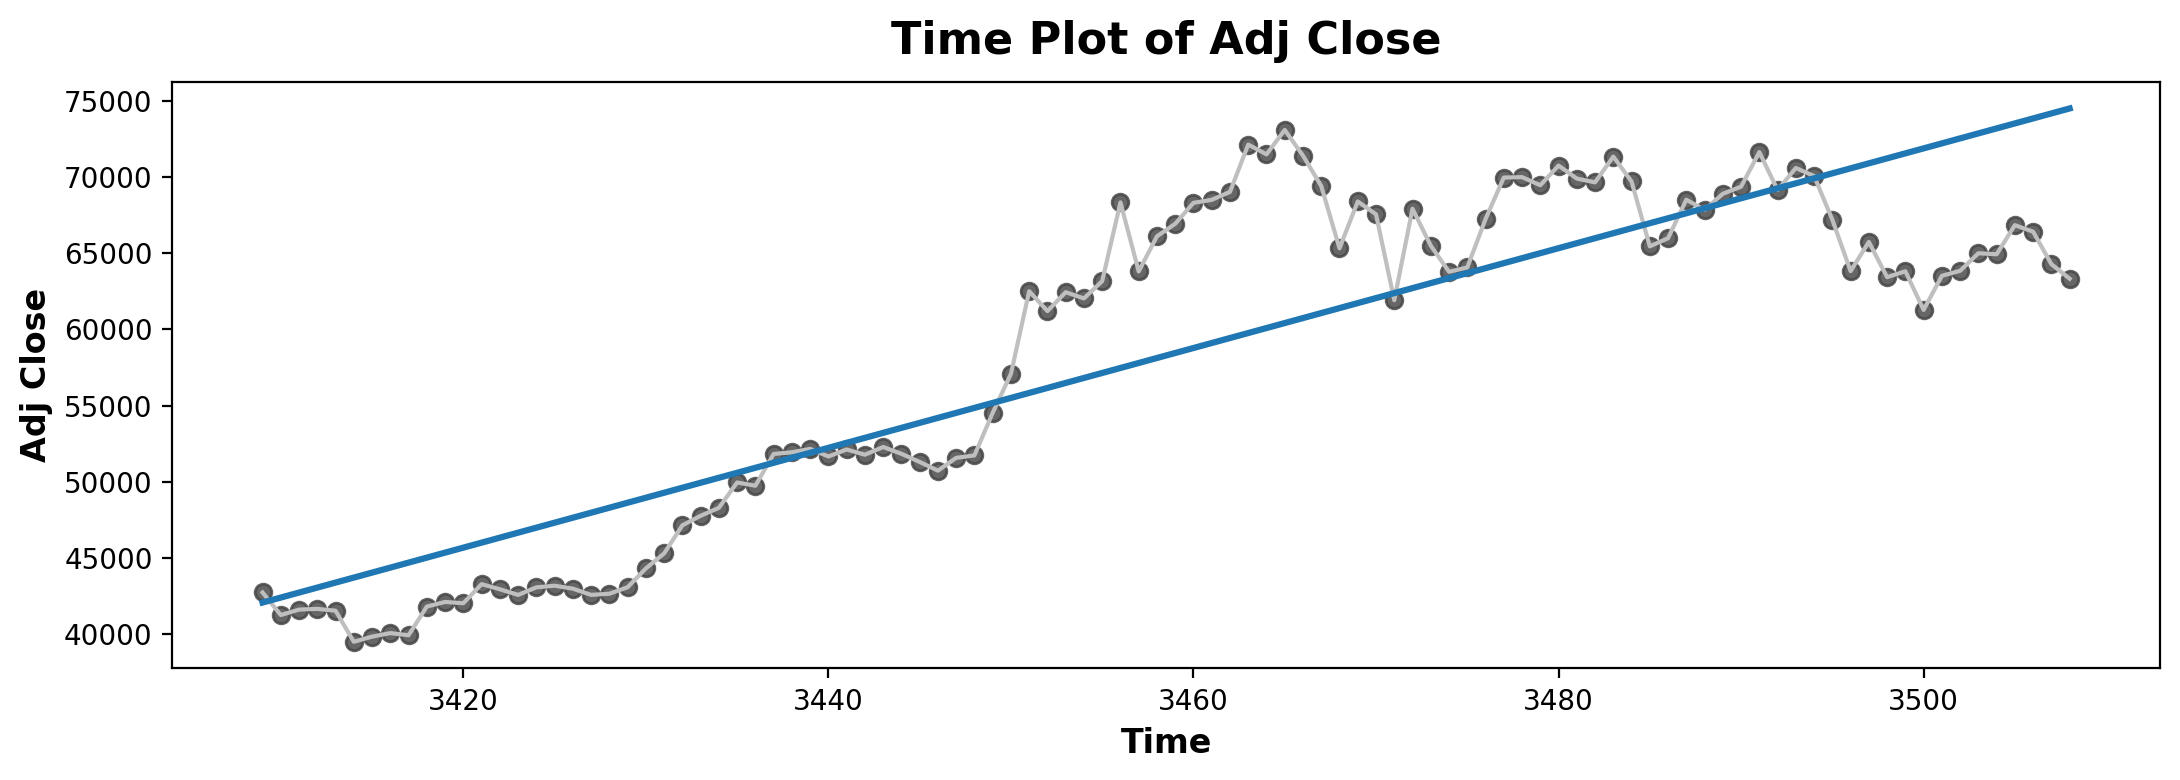

In [9]:
# Adj close vs time, regression
fig, ax = plt.subplots()
ax.plot('Time', 'Adj Close', data=df_copy.tail(100), color='0.75')
ax = sns.regplot(x='Time', y='Adj Close', data=df_copy.tail(100), ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Adj Close');

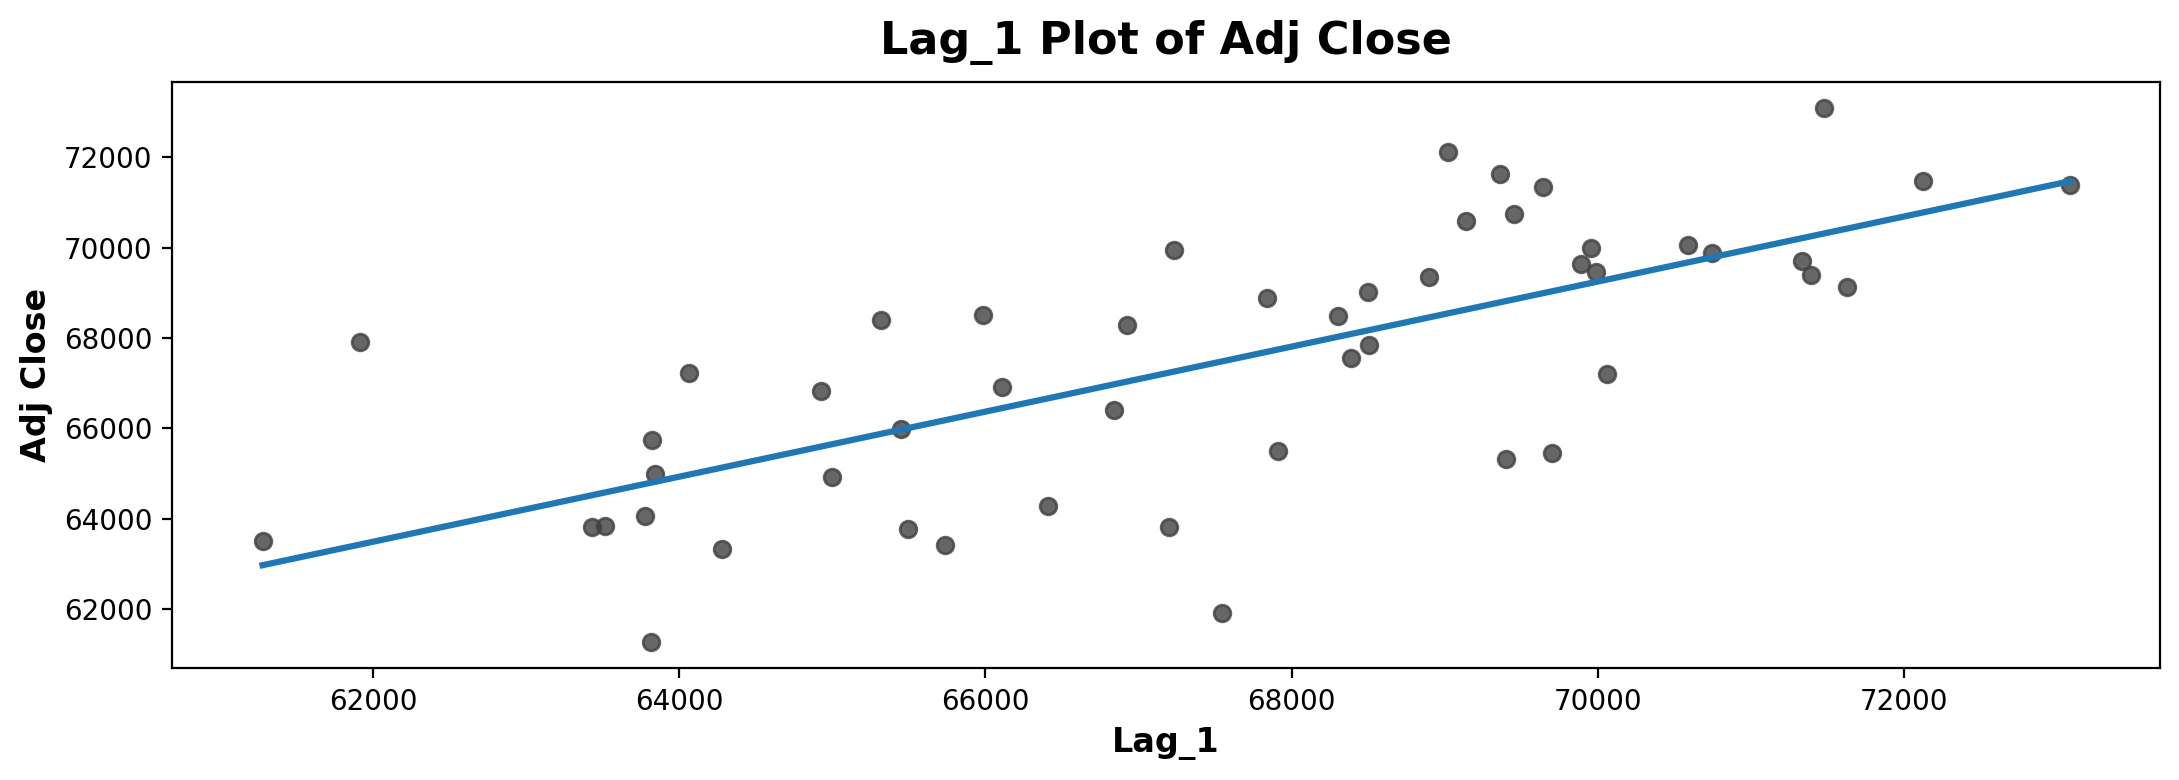

In [10]:
# Adj close vs lag, regression

ax.plot('Lag_1', 'Adj Close', data=df_copy.tail(50), color='0.75')
ax = sns.regplot(x='Lag_1', y='Adj Close', data=df_copy.tail(50), ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Lag_1 Plot of Adj Close');

In [15]:
# linear regression model with time dummy
from sklearn.linear_model import LinearRegression

# Training data
X = df_copy.loc[:, ['Time']]  # features
y = df_copy.loc[:, 'Adj Close']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values
y_pred = pd.Series(model.predict(X), index=X.index)

In [16]:
X.head()

,Time
Date,
2014-09-17,0
2014-09-18,1
2014-09-19,2
2014-09-20,3
2014-09-21,4


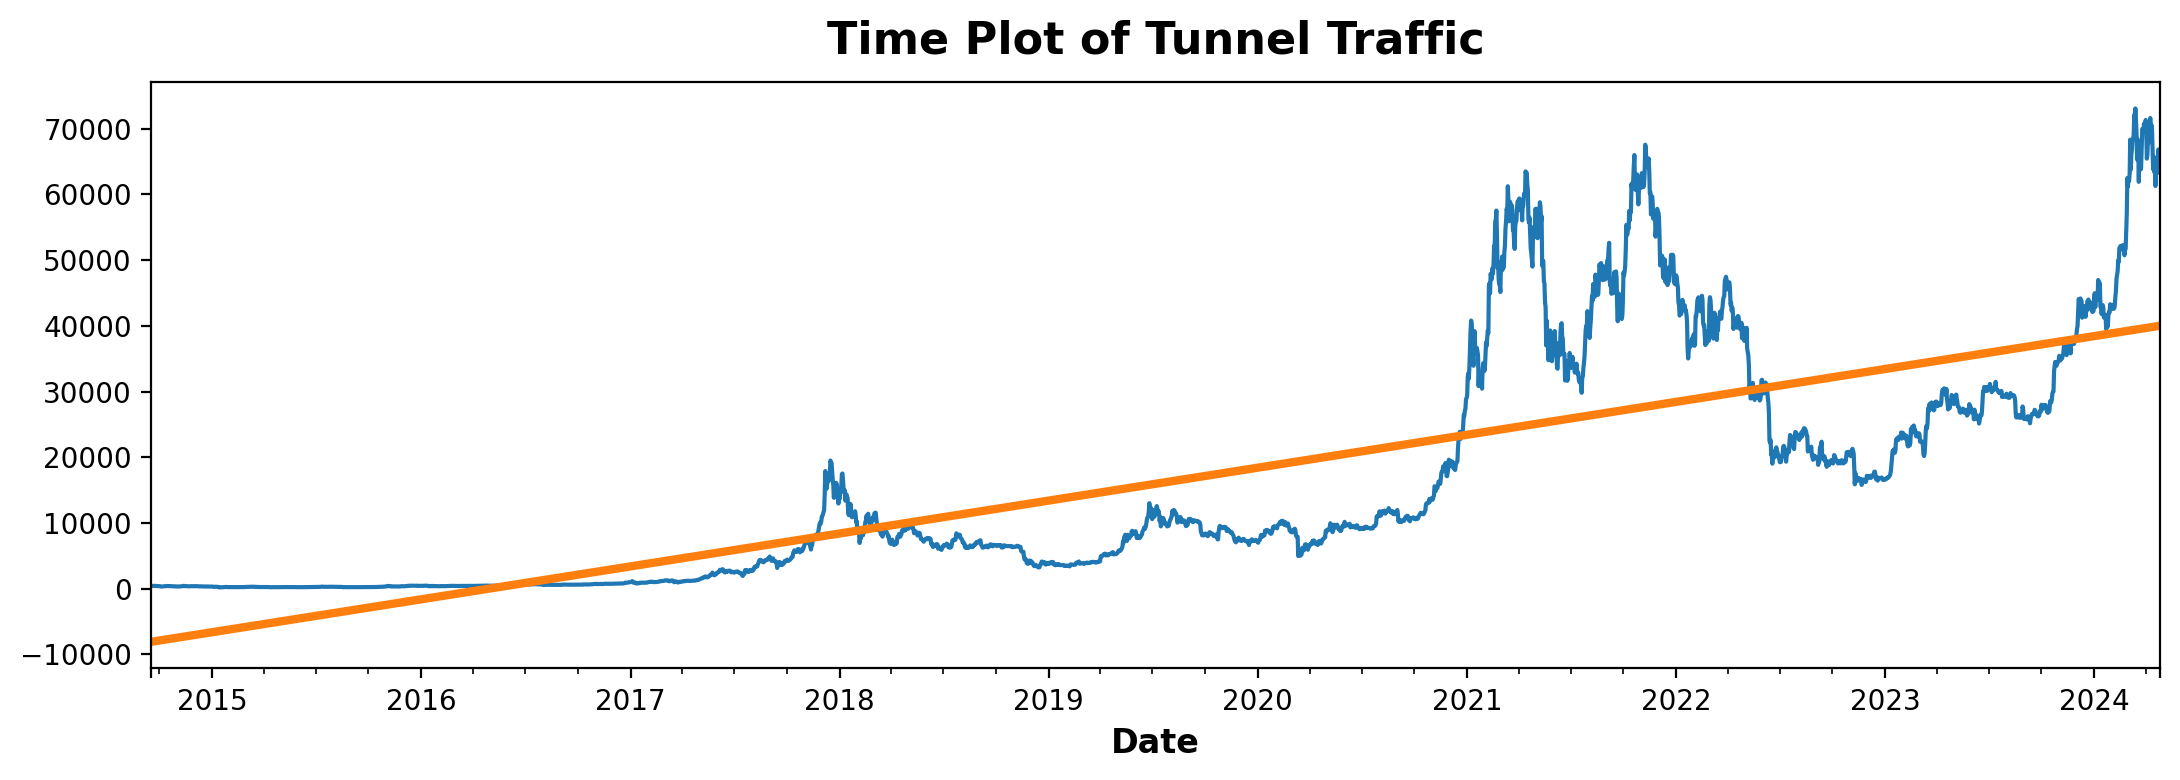

In [12]:
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic');

In [13]:
# linear regression with lag feature
X = df_copy.loc[:, ['Lag_1']]
X.dropna(inplace=True) 

y = df_copy.loc[:, 'Adj Close']

y, X = y.align(X, join='inner') 

model_lag = LinearRegression()
model_lag.fit(X, y)

y_pred = pd.Series(model_lag.predict(X), index=X.index)

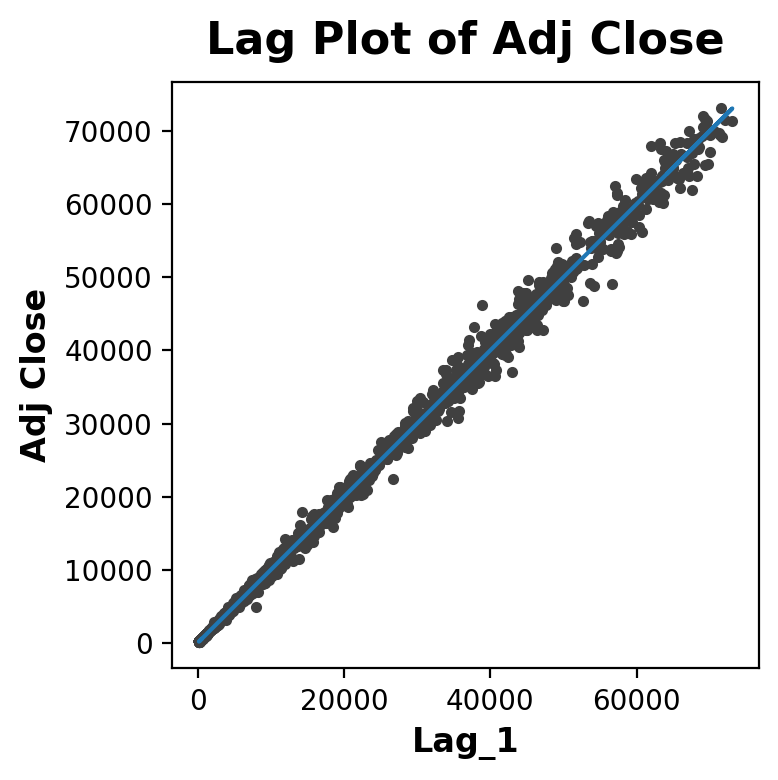

In [14]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('Adj Close')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Adj Close');